In [ ]:
pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28*28 images of hand written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras. utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8670 - loss: 0.4750
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9663 - loss: 0.1104
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9781 - loss: 0.0694
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0530
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9877 - loss: 0.0376
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9907 - loss: 0.0279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9925 - loss: 0.0222
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9945 - loss: 0.0173
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9949 - loss: 0.0151
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9954 - loss: 0.0130


In [3]:
val_loss, val_acc =  model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.1161
0.10206766426563263 0.9782000184059143


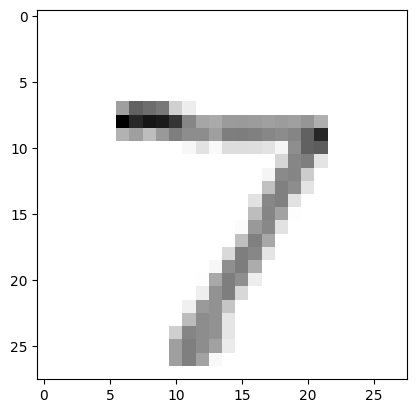

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()
#print(x_train[0])

In [23]:
export_dir = '/content/'

In [14]:
tf.saved_model.save(model, export_dir)

In [24]:
new_model = tf.saved_model.load(export_dir)

In [32]:
predictions = (model.predict(x_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [33]:
print(predictions)

[[6.4093506e-14 2.1489951e-13 3.6024612e-09 ... 9.9999994e-01
  3.7795973e-13 3.6865741e-10]
 [9.9248128e-19 1.8078603e-11 9.9999994e-01 ... 5.9663706e-18
  5.0582914e-15 1.2191298e-26]
 [2.6242539e-13 9.9999768e-01 2.4815501e-08 ... 1.9597010e-06
  2.0226653e-07 3.5868019e-12]
 ...
 [5.2013461e-16 1.4210724e-11 2.3693742e-13 ... 7.8721648e-08
  5.1711913e-10 8.6054381e-09]
 [2.9958902e-13 1.2978951e-12 2.5476361e-14 ... 1.4155372e-12
  7.4744225e-06 3.0104567e-17]
 [3.9177096e-11 3.9069689e-16 1.2439374e-13 ... 1.0108601e-18
  1.5652502e-11 4.8520155e-17]]


In [34]:
import numpy as np
print(np.argmax(predictions[0]))

7


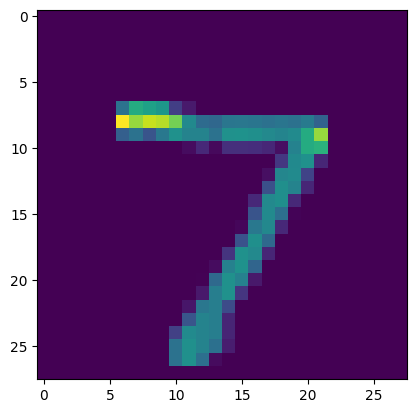

In [37]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
model.summary()
